## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="softmax")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
#optimizer = keras.optimizers.Adam(lr=0.001)
#model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

'\nCompile 模型\n'

In [6]:
"""
設定要訓練的 Epoch 數
"""
def fit(optimizer):
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=500, 
              batch_size=256, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    return model

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
def show_result(model):
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [8]:
optimizer = keras.optimizers.Adam(lr=0.001)
model_adam = fit(optimizer)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 290us/step - loss: 2.2485 - acc: 0.1714 - val_loss: 2.2132 - val_acc: 0.1772
Epoch 2/500
50000/50000 [==============================] - 13s 267us/step - loss: 2.1616 - acc: 0.1927 - val_loss: 2.1482 - val_acc: 0.2001
Epoch 3/500
50000/50000 [==============================] - 13s 266us/step - loss: 2.1009 - acc: 0.2209 - val_loss: 2.0606 - val_acc: 0.2689
Epoch 4/500
50000/50000 [==============================] - 13s 266us/step - loss: 2.0373 - acc: 0.2721 - val_loss: 2.0188 - val_acc: 0.2966
Epoch 5/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.9737 - acc: 0.3153 - val_loss: 1.9328 - val_acc: 0.3332
Epoch 6/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.9122 - acc: 0.3373 - val_loss: 1.8709 - val_acc: 0.3532
Epoch 7/500
50000/50000 [==============================] - 13s

50000/50000 [==============================] - 13s 270us/step - loss: 1.0229 - acc: 0.6621 - val_loss: 1.5206 - val_acc: 0.5053
Epoch 57/500
50000/50000 [==============================] - 13s 270us/step - loss: 0.9988 - acc: 0.6731 - val_loss: 1.5195 - val_acc: 0.5057
Epoch 58/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.9965 - acc: 0.6716 - val_loss: 1.5363 - val_acc: 0.5079
Epoch 59/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.9858 - acc: 0.6766 - val_loss: 1.5338 - val_acc: 0.5085
Epoch 60/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.9830 - acc: 0.6775 - val_loss: 1.5302 - val_acc: 0.5051
Epoch 61/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.9720 - acc: 0.6812 - val_loss: 1.5617 - val_acc: 0.5016
Epoch 62/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.9695 - acc: 0.6823 - val_loss: 1.5433 - val_acc: 0.5090
Epoch 63/500
50000/50000 [

50000/50000 [==============================] - 11s 220us/step - loss: 0.7474 - acc: 0.7600 - val_loss: 1.7964 - val_acc: 0.4921
Epoch 115/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.7450 - acc: 0.7639 - val_loss: 1.8135 - val_acc: 0.4952
Epoch 116/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.7373 - acc: 0.7656 - val_loss: 1.8250 - val_acc: 0.4910
Epoch 117/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.7452 - acc: 0.7611 - val_loss: 1.8122 - val_acc: 0.4959
Epoch 118/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.7290 - acc: 0.7670 - val_loss: 1.8153 - val_acc: 0.4964
Epoch 119/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.7287 - acc: 0.7681 - val_loss: 1.8340 - val_acc: 0.4947
Epoch 120/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.7259 - acc: 0.7685 - val_loss: 1.8214 - val_acc: 0.4889
Epoch 121/500
50000/

Epoch 172/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.6347 - acc: 0.8029 - val_loss: 2.0132 - val_acc: 0.4879
Epoch 173/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.6193 - acc: 0.8090 - val_loss: 2.0326 - val_acc: 0.4870
Epoch 174/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.6190 - acc: 0.8072 - val_loss: 2.0293 - val_acc: 0.4832
Epoch 175/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.6102 - acc: 0.8100 - val_loss: 2.0278 - val_acc: 0.4869
Epoch 176/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.6148 - acc: 0.8095 - val_loss: 2.0491 - val_acc: 0.4819
Epoch 177/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.6308 - acc: 0.8031 - val_loss: 2.0536 - val_acc: 0.4857
Epoch 178/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.6253 - acc: 0.8053 - val_loss: 2.0449 - val_acc: 0.4861
Epoch 

Epoch 230/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.5640 - acc: 0.8278 - val_loss: 2.1735 - val_acc: 0.4826
Epoch 231/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.5691 - acc: 0.8263 - val_loss: 2.1550 - val_acc: 0.4803
Epoch 232/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.5268 - acc: 0.8414 - val_loss: 2.1651 - val_acc: 0.4816
Epoch 233/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.5441 - acc: 0.8351 - val_loss: 2.1963 - val_acc: 0.4831
Epoch 234/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.5565 - acc: 0.8296 - val_loss: 2.1843 - val_acc: 0.4811
Epoch 235/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.5659 - acc: 0.8268 - val_loss: 2.1937 - val_acc: 0.4823
Epoch 236/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.5908 - acc: 0.8190 - val_loss: 2.1735 - val_acc: 0.4852
Epoch 

Epoch 288/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.5059 - acc: 0.8471 - val_loss: 2.2749 - val_acc: 0.4794
Epoch 289/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.5194 - acc: 0.8436 - val_loss: 2.2778 - val_acc: 0.4778
Epoch 290/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.5247 - acc: 0.8418 - val_loss: 2.3008 - val_acc: 0.4770
Epoch 291/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.5318 - acc: 0.8389 - val_loss: 2.2677 - val_acc: 0.4797
Epoch 292/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.5141 - acc: 0.8453 - val_loss: 2.2960 - val_acc: 0.4776
Epoch 293/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.5095 - acc: 0.8463 - val_loss: 2.2820 - val_acc: 0.4786
Epoch 294/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.5239 - acc: 0.8424 - val_loss: 2.2770 - val_acc: 0.4818
Epoch 

Epoch 345/500
50000/50000 [==============================] - 12s 241us/step - loss: 0.5318 - acc: 0.8393 - val_loss: 2.3526 - val_acc: 0.4731
Epoch 346/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.5172 - acc: 0.8451 - val_loss: 2.3256 - val_acc: 0.4787
Epoch 347/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.4790 - acc: 0.8575 - val_loss: 2.3617 - val_acc: 0.4775
Epoch 348/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.4957 - acc: 0.8514 - val_loss: 2.3419 - val_acc: 0.4820
Epoch 349/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.5108 - acc: 0.8474 - val_loss: 2.3440 - val_acc: 0.4793
Epoch 350/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.5112 - acc: 0.8471 - val_loss: 2.3386 - val_acc: 0.4802
Epoch 351/500
50000/50000 [==============================] - 12s 241us/step - loss: 0.5068 - acc: 0.8490 - val_loss: 2.3298 - val_acc: 0.4811
Epoch 

50000/50000 [==============================] - 12s 233us/step - loss: 0.4623 - acc: 0.8628 - val_loss: 2.4154 - val_acc: 0.4780
Epoch 403/500
50000/50000 [==============================] - 12s 230us/step - loss: 0.4712 - acc: 0.8603 - val_loss: 2.3785 - val_acc: 0.4771
Epoch 404/500
50000/50000 [==============================] - 12s 231us/step - loss: 0.4901 - acc: 0.8551 - val_loss: 2.4037 - val_acc: 0.4777
Epoch 405/500
50000/50000 [==============================] - 12s 230us/step - loss: 0.4855 - acc: 0.8543 - val_loss: 2.4113 - val_acc: 0.4802
Epoch 406/500
50000/50000 [==============================] - 12s 231us/step - loss: 0.4747 - acc: 0.8596 - val_loss: 2.4043 - val_acc: 0.4773
Epoch 407/500
50000/50000 [==============================] - 12s 231us/step - loss: 0.4982 - acc: 0.8522 - val_loss: 2.3856 - val_acc: 0.4824
Epoch 408/500
50000/50000 [==============================] - 12s 231us/step - loss: 0.4762 - acc: 0.8589 - val_loss: 2.4154 - val_acc: 0.4804
Epoch 409/500
50000/

Epoch 460/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.4610 - acc: 0.8641 - val_loss: 2.4419 - val_acc: 0.4762
Epoch 461/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.4707 - acc: 0.8614 - val_loss: 2.4587 - val_acc: 0.4783
Epoch 462/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.4990 - acc: 0.8537 - val_loss: 2.4449 - val_acc: 0.4755
Epoch 463/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.4372 - acc: 0.8715 - val_loss: 2.4535 - val_acc: 0.4762
Epoch 464/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.4576 - acc: 0.8661 - val_loss: 2.4504 - val_acc: 0.4776
Epoch 465/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.4920 - acc: 0.8546 - val_loss: 2.4451 - val_acc: 0.4762
Epoch 466/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.4858 - acc: 0.8564 - val_loss: 2.4417 - val_acc: 0.4780
Epoch 

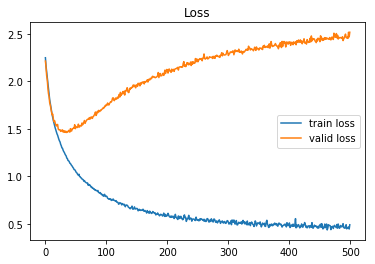

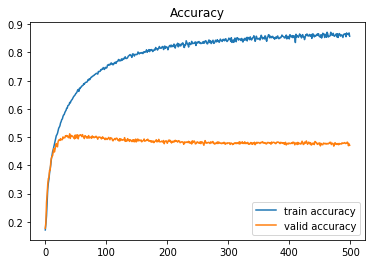

In [9]:
show_result(model_adam)

In [10]:
optimizer = keras.optimizers.SGD(lr=0.001)
model_SGD = fit(optimizer)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.4464 - acc: 0.8700 - val_loss: 2.4717 - val_acc: 0.4792
Epoch 2/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3974 - acc: 0.8858 - val_loss: 2.4670 - val_acc: 0.4787
Epoch 3/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3851 - acc: 0.8903 - val_loss: 2.4647 - val_acc: 0.4787
Epoch 4/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3790 - acc: 0.8925 - val_loss: 2.4638 - val_acc: 0.4786
Epoch 5/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3753 - acc: 0.8937 - val_loss: 2.4630 - val_acc: 0.4783
Epoch 6/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3727 - acc: 0.8949 - val_loss: 2.4621 - val_acc: 0.4783
Epoch 7/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3708 - acc: 0.8955 - val_l

Epoch 59/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3500 - acc: 0.9019 - val_loss: 2.4656 - val_acc: 0.4831
Epoch 60/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.3499 - acc: 0.9018 - val_loss: 2.4657 - val_acc: 0.4830
Epoch 61/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3497 - acc: 0.9018 - val_loss: 2.4654 - val_acc: 0.4831
Epoch 62/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.3495 - acc: 0.9019 - val_loss: 2.4658 - val_acc: 0.4830
Epoch 63/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3494 - acc: 0.9019 - val_loss: 2.4666 - val_acc: 0.4831
Epoch 64/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.3492 - acc: 0.9020 - val_loss: 2.4659 - val_acc: 0.4825
Epoch 65/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.3491 - acc: 0.9021 - val_loss: 2.4658 - val_acc: 0.4827
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.3433 - acc: 0.9036 - val_loss: 2.4716 - val_acc: 0.4830
Epoch 118/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3432 - acc: 0.9036 - val_loss: 2.4721 - val_acc: 0.4838
Epoch 119/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.3431 - acc: 0.9037 - val_loss: 2.4716 - val_acc: 0.4833
Epoch 120/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3431 - acc: 0.9037 - val_loss: 2.4721 - val_acc: 0.4834
Epoch 121/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3430 - acc: 0.9038 - val_loss: 2.4722 - val_acc: 0.4834
Epoch 122/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3429 - acc: 0.9038 - val_loss: 2.4729 - val_acc: 0.4831
Epoch 123/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3428 - acc: 0.9038 - val_loss: 2.4723 - val_acc: 0.4833
Epoch 

Epoch 175/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.3392 - acc: 0.9052 - val_loss: 2.4775 - val_acc: 0.4839
Epoch 176/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.3392 - acc: 0.9051 - val_loss: 2.4774 - val_acc: 0.4834
Epoch 177/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3391 - acc: 0.9051 - val_loss: 2.4776 - val_acc: 0.4831
Epoch 178/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.3391 - acc: 0.9052 - val_loss: 2.4779 - val_acc: 0.4831
Epoch 179/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3390 - acc: 0.9052 - val_loss: 2.4779 - val_acc: 0.4831
Epoch 180/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.3390 - acc: 0.9052 - val_loss: 2.4780 - val_acc: 0.4834
Epoch 181/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3389 - acc: 0.9052 - val_loss: 2.4782 - val_acc: 0.4835
Epoch 

Epoch 233/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3362 - acc: 0.9061 - val_loss: 2.4841 - val_acc: 0.4840
Epoch 234/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3361 - acc: 0.9062 - val_loss: 2.4838 - val_acc: 0.4840
Epoch 235/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3361 - acc: 0.9062 - val_loss: 2.4841 - val_acc: 0.4838
Epoch 236/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3360 - acc: 0.9063 - val_loss: 2.4841 - val_acc: 0.4839
Epoch 237/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3360 - acc: 0.9060 - val_loss: 2.4846 - val_acc: 0.4837
Epoch 238/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3359 - acc: 0.9062 - val_loss: 2.4840 - val_acc: 0.4842
Epoch 239/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3359 - acc: 0.9061 - val_loss: 2.4841 - val_acc: 0.4840
Epoch 

Epoch 291/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3336 - acc: 0.9068 - val_loss: 2.4887 - val_acc: 0.4847
Epoch 292/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3336 - acc: 0.9070 - val_loss: 2.4894 - val_acc: 0.4843
Epoch 293/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3335 - acc: 0.9068 - val_loss: 2.4888 - val_acc: 0.4845
Epoch 294/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3335 - acc: 0.9068 - val_loss: 2.4889 - val_acc: 0.4844
Epoch 295/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.3334 - acc: 0.9068 - val_loss: 2.4894 - val_acc: 0.4846
Epoch 296/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.3334 - acc: 0.9069 - val_loss: 2.4891 - val_acc: 0.4848
Epoch 297/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.3334 - acc: 0.9069 - val_loss: 2.4896 - val_acc: 0.4844
Epoch 

Epoch 349/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3314 - acc: 0.9077 - val_loss: 2.4937 - val_acc: 0.4847
Epoch 350/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3314 - acc: 0.9076 - val_loss: 2.4936 - val_acc: 0.4843
Epoch 351/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3313 - acc: 0.9077 - val_loss: 2.4938 - val_acc: 0.4842
Epoch 352/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3313 - acc: 0.9078 - val_loss: 2.4938 - val_acc: 0.4844
Epoch 353/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3313 - acc: 0.9078 - val_loss: 2.4940 - val_acc: 0.4844
Epoch 354/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.3312 - acc: 0.9077 - val_loss: 2.4940 - val_acc: 0.4840
Epoch 355/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3312 - acc: 0.9077 - val_loss: 2.4945 - val_acc: 0.4843
Epoch 

Epoch 407/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.3297 - acc: 0.9083 - val_loss: 2.4976 - val_acc: 0.4840
Epoch 408/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3296 - acc: 0.9083 - val_loss: 2.4982 - val_acc: 0.4837
Epoch 409/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3296 - acc: 0.9083 - val_loss: 2.4982 - val_acc: 0.4841
Epoch 410/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3296 - acc: 0.9083 - val_loss: 2.4984 - val_acc: 0.4840
Epoch 411/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3296 - acc: 0.9083 - val_loss: 2.4985 - val_acc: 0.4841
Epoch 412/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.3295 - acc: 0.9084 - val_loss: 2.4983 - val_acc: 0.4841
Epoch 413/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.3295 - acc: 0.9084 - val_loss: 2.4985 - val_acc: 0.4845
Epoch 

Epoch 465/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3281 - acc: 0.9087 - val_loss: 2.5031 - val_acc: 0.4841
Epoch 466/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3280 - acc: 0.9085 - val_loss: 2.5038 - val_acc: 0.4841
Epoch 467/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3280 - acc: 0.9087 - val_loss: 2.5035 - val_acc: 0.4842
Epoch 468/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3280 - acc: 0.9086 - val_loss: 2.5041 - val_acc: 0.4838
Epoch 469/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.3280 - acc: 0.9087 - val_loss: 2.5045 - val_acc: 0.4842
Epoch 470/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3279 - acc: 0.9087 - val_loss: 2.5046 - val_acc: 0.4835
Epoch 471/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.3279 - acc: 0.9087 - val_loss: 2.5045 - val_acc: 0.4840
Epoch 

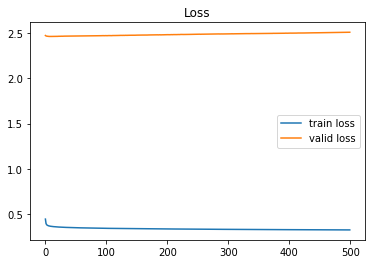

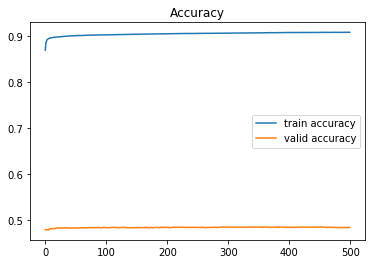

In [11]:
show_result(model_SGD)